In [44]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Create the data and the model

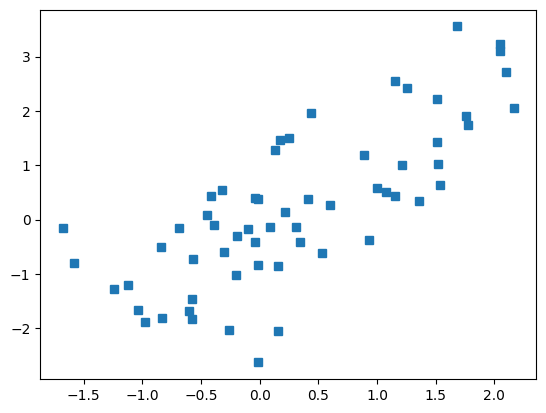

In [33]:
N = 60
x = torch.randn(N,1)
y = x + torch.randn(N,1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [34]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

In [35]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

# Select data for training

In [36]:
def trainingProportion(n, trainingPercent):
  return int(round(n * trainingPercent))

# select training data (note the hard-coded N!)
trainidx  = np.random.choice(range(N),trainingProportion(N, 0.8),replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([48, 1])
torch.Size([12, 1])


# Train the model

In [37]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x[trainBool])

  # compute loss
  loss = lossfun(yHat,y[trainBool])

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [38]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.84
Final TEST loss: 0.99


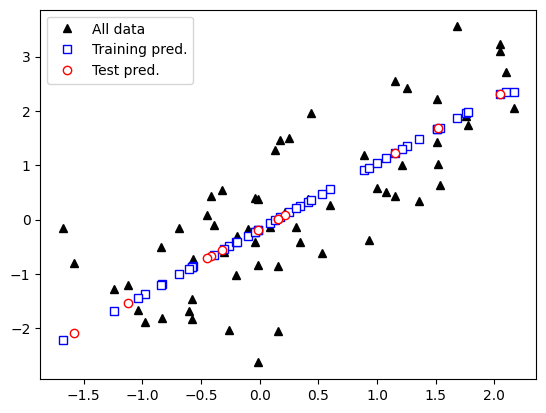

In [39]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

# Code using DataLoader and Scikitlearn

In [42]:
# Dataset that contains the data and labels
dataSet = torch.utils.data.TensorDataset(torch.Tensor(x), torch.Tensor(y))
print(dataSet), print('')
print(dataSet.tensors)


(tensor([[-0.0428],
        [ 1.5143],
        [-0.3937],
        [-0.5663],
        [ 1.6833],
        [-0.8356],
        [ 0.2122],
        [-0.5778],
        [-0.1023],
        [-0.9820],
        [ 2.0441],
        [ 0.1527],
        [-0.0112],
        [ 0.0877],
        [ 2.0490],
        [ 0.8866],
        [ 0.1548],
        [-0.2600],
        [ 0.5990],
        [-1.2462],
        [-0.4147],
        [ 1.2570],
        [-1.1231],
        [ 1.1505],
        [ 0.4092],
        [-0.1985],
        [-0.6900],
        [-0.0118],
        [-0.0152],
        [ 1.5360],
        [-0.5758],
        [ 0.9279],
        [ 1.1573],
        [ 2.1001],
        [ 0.3395],
        [-1.5796],
        [ 1.0037],
        [-0.1976],
        [ 1.3606],
        [-1.6792],
        [ 0.1736],
        [ 1.7568],
        [-0.0445],
        [-0.8455],
        [-0.3052],
        [ 0.4405],
        [ 1.5072],
        [-1.0415],
        [ 0.1276],
        [ 0.2521],
        [ 0.3129],
        [-0.6022],
        [ 

In [43]:
# DataLoader
dataLdr = DataLoader(dataSet, shuffle = True)

for data,lable in dataLdr:
  print(data, lable)

tensor([[1.2120]]) tensor([[1.0041]])
tensor([[-0.5758]]) tensor([[-1.4537]])
tensor([[-0.0445]]) tensor([[-0.4025]])
tensor([[0.5990]]) tensor([[0.2655]])
tensor([[1.0774]]) tensor([[0.5080]])
tensor([[-1.2462]]) tensor([[-1.2830]])
tensor([[2.0490]]) tensor([[3.2309]])
tensor([[-0.9820]]) tensor([[-1.8771]])
tensor([[-0.3937]]) tensor([[-0.0983]])
tensor([[0.2122]]) tensor([[0.1464]])
tensor([[0.3129]]) tensor([[-0.1324]])
tensor([[2.0441]]) tensor([[3.1052]])
tensor([[-0.8356]]) tensor([[-1.8146]])
tensor([[0.1548]]) tensor([[-2.0516]])
tensor([[-0.5778]]) tensor([[-1.8276]])
tensor([[1.1573]]) tensor([[2.5444]])
tensor([[1.5072]]) tensor([[2.2226]])
tensor([[-1.1231]]) tensor([[-1.1951]])
tensor([[-0.2600]]) tensor([[-2.0376]])
tensor([[-0.1985]]) tensor([[-1.0233]])
tensor([[-1.0415]]) tensor([[-1.6586]])
tensor([[0.1527]]) tensor([[-0.8611]])
tensor([[-0.3052]]) tensor([[-0.6002]])
tensor([[1.5360]]) tensor([[0.6342]])
tensor([[-0.0152]]) tensor([[0.3723]])
tensor([[-0.1976]]) te

In [59]:
# scikitlearn to separate the data
trainData, testData, trainLabel, testLabel = train_test_split(x, y, train_size=0.8)


In [61]:
numepochs = 500
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(trainData)

  # compute loss
  loss = lossfun(yHat,trainLabel)

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [66]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(testLabel)
testloss = (predYtest-testLabel).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.72
Final TEST loss: 0.15


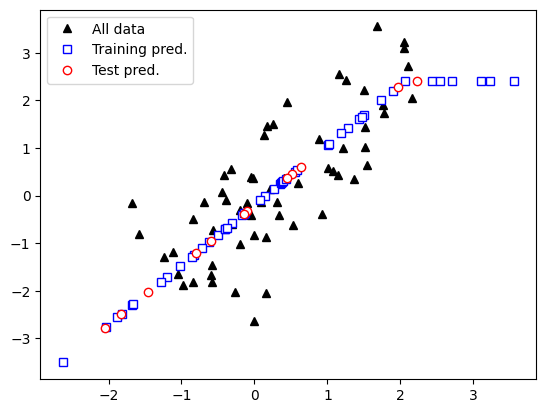

In [67]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(trainLabel).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(trainLabel, predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(testLabel,predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()